Signature and Log-signature for the Study of Empirical Distributions Generated with GANs. https://arxiv.org/abs/2203.03226

J. de Curtò y DíAz, I. de Zarzà i Cubero and Hong Yan.
{decurtoydiaz,dezarzaycubero}@innocimda.com

**Acknowledgements**

This work is part of CIMDA (Centre for Intelligent Multidimensional Data Analysis), HK Science Park, HK.

A joint Center between City University of Hong Kong and the University of Oxford.

Our work has been supported by HK Innovation and Technology Commission (InnoHK Project CIMDA) and HK Research Grants Council (Project CityU 11204821).


In this notebook we are going to illustrate how to compute K-means clustering and PCA(2) as described in Section 4.1.


First, load your drive and make sure you have a folder with a dataset of your choice to visualize. Here we will use MetFaces (you can add a shortcut to drive from the original dataset found here https://github.com/NVlabs/metfaces-dataset).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the following path accordingly with the full dataset to visualize (folder). 

In [ ]:
folder = '/content/drive/MyDrive/metfaces-release/images/'

Transform to grayscale, resize at 64x64 and flatten the samples to store them into a vector.

In [ ]:
import cv2
import os

data = []

for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        image = image.flatten()
        data.append([image, folder + filename])

Extract the information into arrays for further processing. Print the length.

In [ ]:
print(len(data))
features, images  = zip(*data)

1336


Choose number of clusters to generate. For example the number of classes you want to distinguish. Here we use 2 for simplicity.

In [ ]:
n_cams = 2

PCA(2) and K-Means Clustering. Projection in the 2D Plane prior to the algorithm of clustering.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import numpy as np

features = np.array(features)
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(features)

#MiniBatch K-means clustering
kmeans = MiniBatchKMeans(n_clusters=n_cams)

#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

In [ ]:
tx, ty = df[:,0], df[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

Plot the resultant clusters.

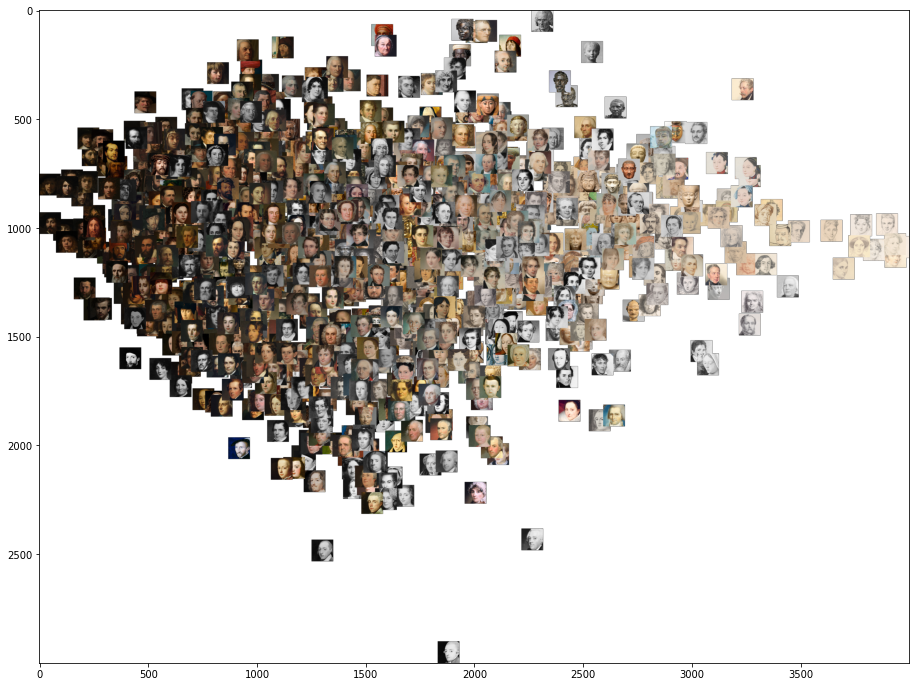

In [ ]:
import matplotlib.pyplot
from matplotlib.pyplot import imshow
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

Adapt the following paths accordingly to store the results in your drive.

In [ ]:
import os
import json

full_image.save("/content/drive/MyDrive/clustering_metfaces.png")
path_clustering = "/content/drive/MyDrive/clustering_metfaces.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(path_clustering, 'w') as outfile:
    json.dump(data, outfile)

print("Saved K-means Clustering to %s" % path_clustering)

saved K-means Clustering to /content/drive/MyDrive/clustering_metfaces.json


Visualize the clusters.

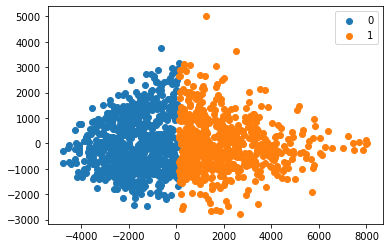

In [ ]:
import matplotlib.pyplot as plt

for c in u_labels:
    plt.scatter(df[label == c , 0] , df[label == c , 1] , label = c)
plt.legend()
plt.savefig('/content/drive/MyDrive/visualize_clustering_metfaces.png', dpi=300, bbox_inches='tight')
plt.show()